In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [7]:
df = pd.read_excel('test.xlsx', 
                 usecols=['Date', 'Player', 'Month','Succ'])
df.head(3)

,Date,Player,Month,Succ
0,2019-08-19,Adama,August,2
1,2019-08-25,Adama,August,2
2,2019-09-01,Adama,September,5


In [9]:
current_month = 'July'
dff = (df[df['Month'].eq(current_month)]
       .sort_values(by='Succ', ascending=True)
       .head(10))
dff

,Date,Player,Month,Succ
74,2020-07-26,Wilf,July,1
32,2020-07-08,Adama,July,2
73,2020-07-20,Wilf,July,2
31,2020-07-04,Adama,July,3
33,2020-07-12,Adama,July,3
36,2020-07-26,Adama,July,3
70,2020-07-07,Wilf,July,3
34,2020-07-15,Adama,July,4
69,2020-07-04,Wilf,July,4
35,2020-07-20,Adama,July,5


<BarContainer object of 10 artists>

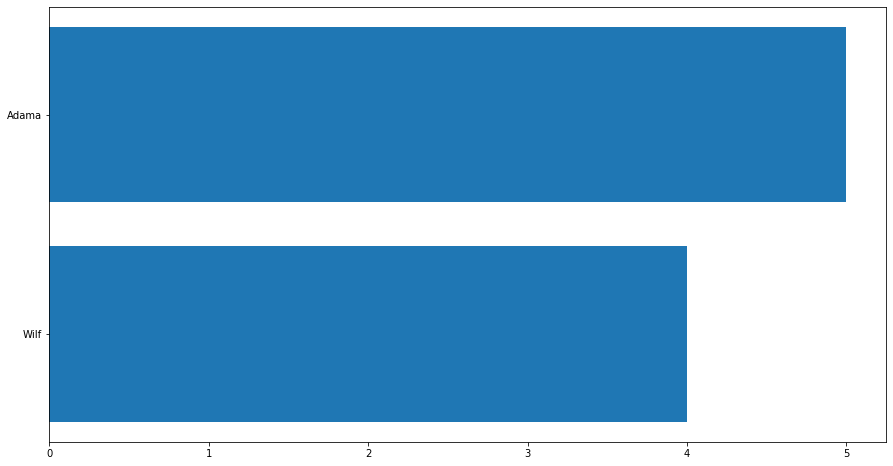

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['Player'], dff['Succ'])

In [12]:
colors = dict(zip(
    ['Wilf', 'Adama'],
    ['#adb0ff', '#ffb3ff']
))
group_lk = df.set_index('Player')['Date'].to_dict()

KeyError: Timestamp('2020-07-26 00:00:00')

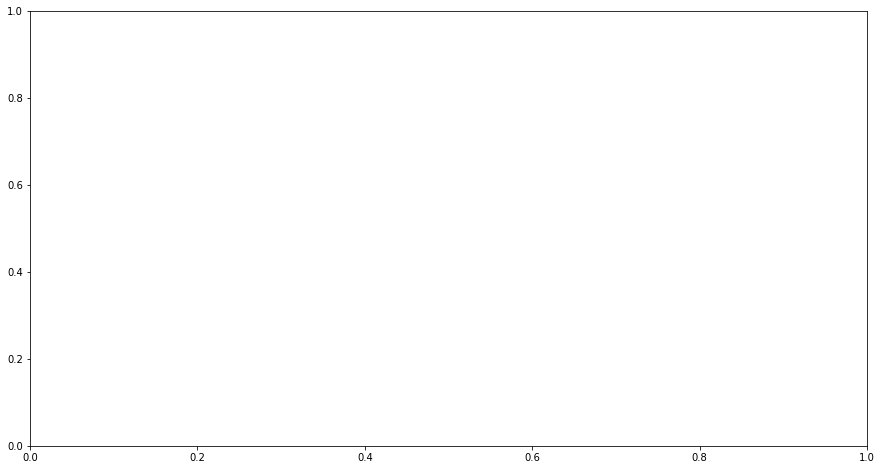

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Player'], dff['Succ'], color=[colors[group_lk[x]] for x in dff['Player']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (Succ, Player) in enumerate(zip(dff['Succ'], dff['Player'])):
    ax.text(value, i,     Player,            ha='right')  # Tokyo: name
    ax.text(value, i, Date,  ha='right')  # Asia: group name
    ax.text(value, i,     Succ,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_month, transform=ax.transAxes, size=46, ha='right')